In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [183]:
#Read Human and AI responses for ids 26-40 and 45-50
data_ai_responses=pd.read_json('filtered_prompts_AI_1st_stage.json')
data_ai_responses1=data_ai_responses[(data_ai_responses['id']>=26) & (data_ai_responses['id']<=40) ]
data_ai_responses2=data_ai_responses[(data_ai_responses['id']>=45) & (data_ai_responses['id']<=50) ]
data_ai_responses=pd.concat([data_ai_responses1,data_ai_responses2])

#print(data_ai_responses)

data_human_responses=pd.read_excel('submissions_stage1_pool3.xls')
#print(data_human_responses)
#print(data_human_responses.loc[:,'INPUT:id'])
data_human_responses1=data_human_responses[(data_human_responses['INPUT:id']>=26) & (data_human_responses['INPUT:id']<=40) ]
data_human_responses2=data_human_responses[(data_human_responses['INPUT:id']>=45) & (data_human_responses['INPUT:id']<=50) ]
data_human_responses=pd.concat([data_human_responses1,data_human_responses2])
#print(data_human_responses.loc[:,'INPUT:id'])
#print(data_human_responses)


          INPUT:price     price_avg      mape
INPUT:id                                     
26          1290000.0  8.000000e+05  0.379845
27           962500.0  8.500000e+05  0.116883
28           875000.0  1.012500e+06  0.157143
29          1650000.0  9.375000e+05  0.431818
30          1199000.0  1.012500e+06  0.155546
31           789000.0  9.500000e+05  0.204056
32          1039000.0  1.033333e+06  0.005454
33           365000.0  3.500000e+05  0.041096
34          1695000.0  4.500000e+05  0.734513
35           999000.0  7.500000e+05  0.249249
36          1294000.0  1.000000e+06  0.227202
37          1089000.0  1.025000e+06  0.058770
38           799900.0  7.500000e+05  0.062383
39          1229000.0  8.000000e+05  0.349064
40           455000.0  3.500000e+05  0.230769
45           350000.0  4.500000e+05  0.285714
46           425000.0  4.500000e+05  0.058824
47           500000.0  5.500000e+05  0.100000
48           589900.0  8.166667e+05  0.384415
49           419000.0  2.500000e+0

C:\Users\30697\AppData\Local\Temp\ipykernel_11652\2239864732.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_human_grouped_by_house=data_human_responses.groupby(['INPUT:id']).mean()[['INPUT:price','price_avg']]


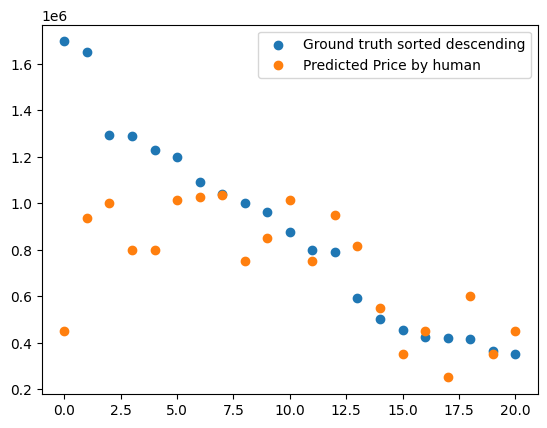

In [184]:
#data.drop(data[data['INPUT:price']>3000000],inplace=True)
data_human_responses=data_human_responses[data_human_responses['INPUT:price']<3000000]
data_human_responses['price_avg']=[0 for i in range(data_human_responses.shape[0])]
data_human_responses.loc[data_human_responses['OUTPUT:price']=='0-100','price_avg']=50000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='100-200','price_avg']=15000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='200-300','price_avg']=250000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='300-400','price_avg']=350000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='400-500','price_avg']=450000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='500-600','price_avg']=550000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='600-700','price_avg']=650000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='700-800','price_avg']=750000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='800-900','price_avg']=850000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='900-1','price_avg']=950000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='1-1.25','price_avg']=1125000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='1.25-1.5','price_avg']=1375000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='1.5-1.75','price_avg']=1625000
data_human_responses.loc[data_human_responses['OUTPUT:price']=='1.75-2','price_avg']=1875000
#print(data['price_avg'])
#print(data.columns)
data_human_grouped_by_house=data_human_responses.groupby(['INPUT:id']).mean()[['INPUT:price','price_avg']]
data_human_responses=data_human_grouped_by_house
#print(data['INPUT:price'])
data_human_responses['mape']=[0 for i in range(data_human_responses.shape[0])]

data_human_responses['mape']=abs(data_human_responses['INPUT:price']-data_human_responses['price_avg'])/data_human_responses['INPUT:price']
#data=data[:20]
data_human_responses_with_id=data_human_responses
print(data_human_responses_with_id)
print('MAPE:')
print(np.mean(data_human_responses['mape']))
data_human_responses=data_human_responses.sort_values(by='INPUT:price',ascending=False).reset_index(drop=True)
#print(data_human_responses['INPUT:price'].head())
plt.scatter(data_human_responses.index,data_human_responses['INPUT:price'],label='Ground truth sorted descending')
plt.scatter(data_human_responses.index,data_human_responses['price_avg'],label='Predicted Price by human')
plt.legend()
#print(data['price_avg'])
#plt.boxplot([data['INPUT:price'],data['price_avg']])
#plt.xticks([1, 2], ['Ground Truth', 'Predicted'])

#plt.show()

#print(data_human_responses.head())

0.3626913474911749


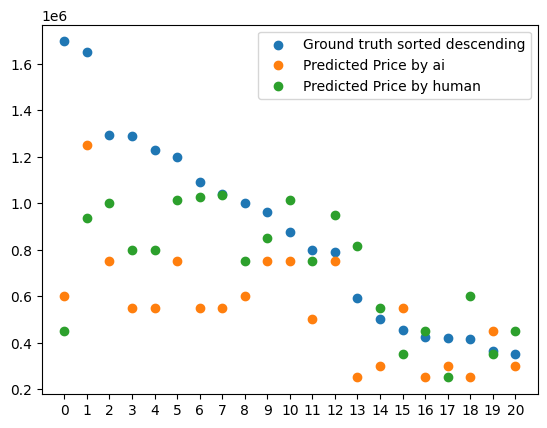

In [191]:
#data.drop(data[data['INPUT:price']>3000000],inplace=True)
#data_ai_responses=data_ai_responses[data_ai_responses['INPUT:price']<3000000]
#print(data_human_responses)
#data_ai_responses.loc[data_ai_responses['OUTPUT:price']=='1.5-1.75','price_avg']=1625000
data_ai_responses['price_ai']=(data_ai_responses['price_prediction_lower_bound']+data_ai_responses['price_prediction_upper_bound'])/2    
#print(data_ai_responses.head())
data_ai_responses['ground_truth']=data_ai_responses['id'].map(data_human_responses_with_id['INPUT:price'])
#data_ai_responses=data_ai_responses.merge(data_human_responses[['INPUT:id','INPUT:price']],left_on='id', right_on='INPUT:id',how='left')
#print(data['price_avg'])
#data_ai_responses_grouped_by_house=data_ai_responses.groupby(['id']).mean()[['ground_truth','price_avg']]

# print(data['INPUT:price'])
data_ai_responses['mape']=[0 for i in range(data_ai_responses.shape[0])]

data_ai_responses['mape']=abs(data_ai_responses['ground_truth']-data_ai_responses['price_ai'])/data_ai_responses['ground_truth']
# #data=data[:20]
print(np.mean(data_ai_responses['mape']))
data_ai_responses=data_ai_responses.sort_values(by='ground_truth',ascending=False).reset_index(drop=True)
#results=data_ai_responses.merge(data_human_responses,left_on='id',right_on='')

results=data_ai_responses[['id','ground_truth','price_ai']].merge(data_human_responses_with_id,left_on='id',right_on='INPUT:id')
#print(results.columns)
#print(data_ai_responses['INPUT:price'].head())
plt.scatter(results.index,results['ground_truth'],label='Ground truth sorted descending')
plt.scatter(results.index,results['price_ai'],label='Predicted Price by ai')
plt.scatter(results.index,results['price_avg'],label='Predicted Price by human')
plt.xticks(range(0,21))
plt.legend()



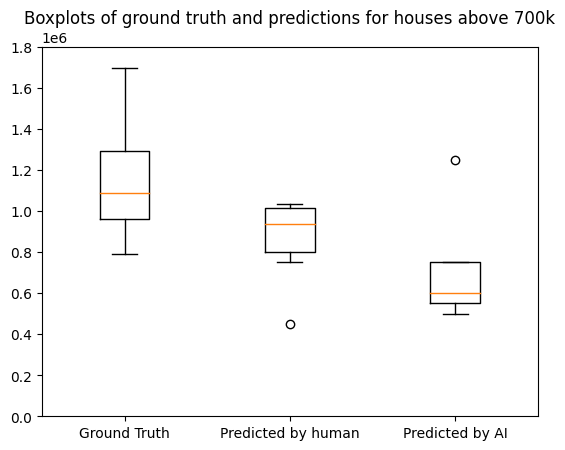

In [186]:
data_over_700k_human=data_human_responses[data_human_responses['INPUT:price']>700000]
data_over_700k_ai=data_ai_responses[data_ai_responses['ground_truth']>700000]



plt.boxplot([data_over_700k_human['INPUT:price'],data_over_700k_human['price_avg'],data_over_700k_ai['price_ai']])
plt.xticks([1, 2,3], ['Ground Truth', 'Predicted by human', 'Predicted by AI'])
plt.title('Boxplots of ground truth and predictions for houses above 700k')
plt.yticks(range(0,2000000,200000))
plt.show()


331250.0


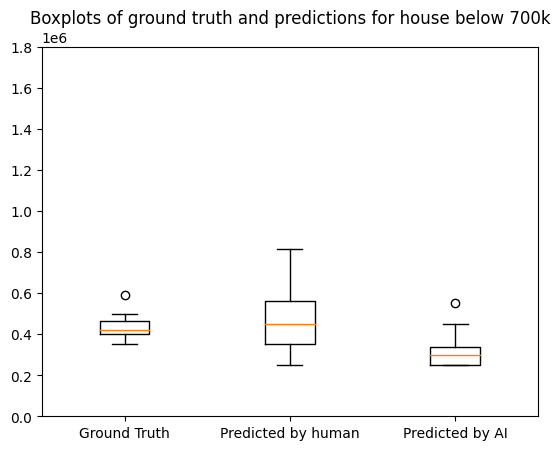

In [187]:
data_below_700k_human=data_human_responses[data_human_responses['INPUT:price']<700000]
data_below_700k_ai=data_ai_responses[data_ai_responses['ground_truth']<700000]
print(data_below_700k_ai['price_ai'].mean())


plt.boxplot([data_below_700k_human['INPUT:price'],data_below_700k_human['price_avg'],data_below_700k_ai['price_ai']])
plt.xticks([1, 2,3], ['Ground Truth', 'Predicted by human', 'Predicted by AI'])
plt.title('Boxplots of ground truth and predictions for house below 700k')
plt.yticks(range(0,2000000,200000))
plt.show()